Proyecto: Análisis edafológico de un terreno para una finca con potencial agrícola en Llano Grande de Cartago.

Estudiantes:
- Katherine Bonilla Mora
- Luis Diego Quesada Perez

**Descripción del proyecto y justificación**

- Finca experimental para un instituto de investigación.
- Se pretende conocer las condiciones del suelo para analizar la prácticas de manejo agropecuario y su potencial uso en investigación.


**Antecedentes**

La ciencia de datos es una nueva rama del conocimiento que se constituye en una herramienta poderosa para el análisis estadístico de los datos. Permite realizar lo que se conoce como analisis exploratorio de datos, visualizar gráficos donde se evidencian relaciones complejas y modificar facilmente los mismos con el fin de acondicionar la información y obtener mejores resultados. En los ultimos años se ha aplicado al área de las ciencias de la vida generando información de gran provecho para los cientificos, agrónomos, veterinarios, biologos, médicos entre otras ramas de las ciencias biológicas. Python es el lenguaje de programación utilizado con mayor frecuencia debido a su facilidad de correlacionar el lenguaje natural con el lenguaje de programación, lo que permite manejar datos tan distintos como sistemas de información geográfica asi como bases de datos biológicas e incluso datos generados en el ambito del laboratorio (Rajan et al. 2023).


El estudio del suelo o edafologia es una ciencia esencial para conocer el terreno y planificar estrategias de manejo del suelo que promuevan la conservación. Nos brinda información detallada y útil que permite sacar conclusiones en el contexto del análisis de datos. Si se correlaciona con las bases de datos de los sistemas de información geográfica, incluso haciendo uso de herramientas como geopandas se obtienen gráficos muy interesantes que se pueden utilizar como referencia para la toma de desiciones y estrategias que impacten directamente en una actividad antropogénica, se pueden enfocar estas desiciones para que el impacto ambiental sea menor y asi podamos tener un desarrollo sostenible. Las actividades agrícolas no son la excepción (Weil & Brady 2017; McBratney et al. 2003).


Hay muchas variables que son objeto de estudio de la edafología, sin embargo tres de ellas nos dan información muy interesante y nos aclaran parte del panorama de estado del suelo. El porcentaje de arcilla que se refiere a una porción del suelo que contiene mayor cantidad de cristales de silicio y que compone una matriz que logra darle consistencia al suelo ayudando en la retencion de nutrientes, plasticidad y permeabilidad del mismo. El contenido de materia orgánica que tambien se determina en terminos de porcentaje es la porción del suelo que contiene mayor contenido de carbono orgánico y se forma por el aporte constante de materia orgánica proveniente de la descomposición de material de orígen biológico. La otra variable importante es el CICE que se refiere a la capacidad de intercambio cationico efectiva relacionada a la conductividad del suelo, el contenido de iones y que es la capacidad del suelo de liberar cationes. En terminos generales entre mayor es la materia organica y la CICE el suelo esta asociado a una mayor fertilidad o disponibilidad de nutrientes para las plantas (Lal 2020; Weil & Brady 2017).



**Descripción del problema y objetivo**

Se tienen un conjunto de datos de muestreos de una finca que consta de tres variables que se necesitan analizar en detalle en relación a variables geográficas.

Objetivo general:

- Obtener un análisis del terreno a utilizar en un sistema agropecuario.

Objetivos específicos:

- Realizar un preprocesamiento y acondicionamiento de los datos.

- Ejecutar un análisis exploratorio de las variables en estudio.

- Obtener gráficos de correlación y análisis geográfico.

**Descripción del conjunto de datos**

La base de datos fue brindada por el Departamento de Estudios Básicos de Tierras del Instituto Nacional de Innovación y Transferencia en Tecnología Agropecuaria.
Es una base de datos que consta de 60 puntos de mueestreo aleaztorizados que se realizó en una finca de 51.5 ha las cuales 28.22 ha son de uso agropecuario y 23.27 de bosque. Las variables son porcentaje de arcilla, porcentaje de materia orgánica y capacidad de intercambio catiónico efectiva.

Preprocesamiento de datos

In [ ]:
!pip install pandas
!pip install ydata-profiling
!pip install geopandas
!pip install geopandas fiona shapely



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

!pip install geodatasets
import geopandas as gpd
import geodatasets
from shapely.geometry import Point
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e175f8442abb2f72d4686acd5dfbf5ab1ebaaedb8ac08963f8c54bba4b34411e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/cia_central_0_20cm.csv",delimiter=",")
df.head()

Mounted at /content/drive


id_cateo   m_o  cice  arcilla  latitud  longitud
0     60CC  5.94  3.39     9.45  9.94265 -83.94206
1     59CC  5.06  2.35     4.45  9.94273 -83.94119
2     58CC  5.31  2.92     6.95  9.94272 -83.94253
3     57CC  5.59  3.44     6.95  9.94336 -83.94227
4     56CC  5.67  3.57     4.45  9.94343 -83.94316

In [ ]:
print(df.dtypes)

id_cateo     object
m_o         float64
cice        float64
arcilla     float64
latitud     float64
longitud    float64
dtype: object


In [ ]:
df2 = df.copy()

df2 = df2.drop(columns=['latitud', 'longitud'])
df2.head()


id_cateo   m_o  cice  arcilla
0     60CC  5.94  3.39     9.45
1     59CC  5.06  2.35     4.45
2     58CC  5.31  2.92     6.95
3     57CC  5.59  3.44     6.95
4     56CC  5.67  3.57     4.45

In [ ]:
# Creamos el informe con pandas-profiling
nombre = "Suelos"
profile = ProfileReport(df2, title=nombre, explorative=True)

# Mostramos el informe en un notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pandas_profiling import ProfileReport

# Generamos el reporte, asegurando que variables continuas no se interpreten como categóricas
profile = ProfileReport(df2, explorative=True, infer_dtypes=False)

# Guardamos el informe y visualizamos nuevamente
profile.to_notebook_iframe()

<ipython-input-6-5c03dcde0a75>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Tenemos una base de datos sin datos faltantes en alguna de las variables de esta.🥳

# Como tenemos puntos de muestreo, cargamos un mapa de CR para poder cargarlos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


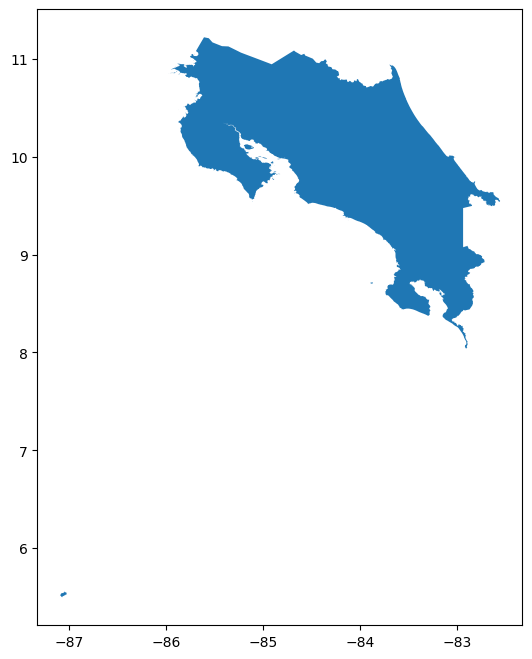

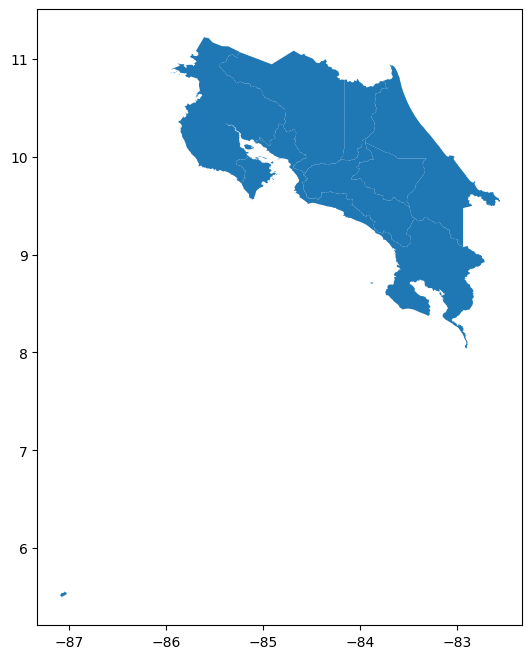

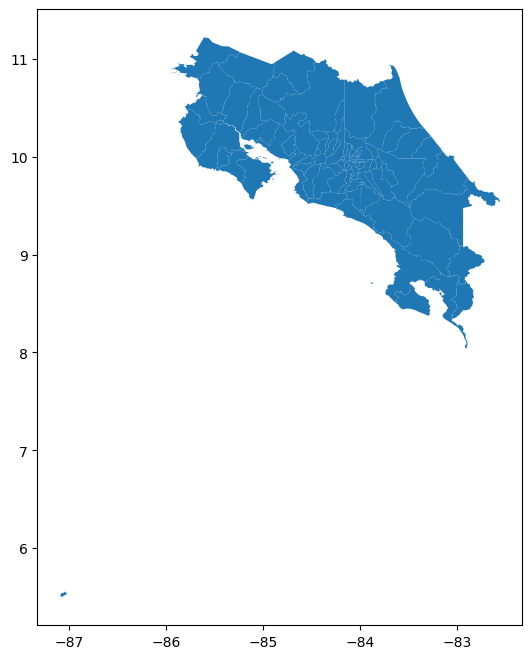

In [ ]:
drive.mount('/content/drive')


gdfs = []


import os.path
for i in range(3):
    file_path = f'/content/drive/MyDrive/Colab_Notebooks/CRI_shp/gadm41_CRI_{i}.shp'
    if os.path.isfile(file_path):
        gdf = gpd.read_file(file_path)

        gdf.plot(figsize=(10, 8))

        gdfs.append(gdf)

        plt.show()
    else:
        print(f"File not found: {file_path}")

In [ ]:
CR_mapa = gdfs[2]
CR_mapa

CR_mapa.head()

GID_2 GID_0     COUNTRY    GID_1    NAME_1 NL_NAME_1      NAME_2  \
0  CRI.1.1_1   CRI  Costa Rica  CRI.1_1  Alajuela        NA    Alajuela   
1  CRI.1.3_1   CRI  Costa Rica  CRI.1_1  Alajuela        NA      Atenas   
2  CRI.1.4_1   CRI  Costa Rica  CRI.1_1  Alajuela        NA      Grecia   
3  CRI.1.5_1   CRI  Costa Rica  CRI.1_1  Alajuela        NA     Guatuso   
4  CRI.1.6_1   CRI  Costa Rica  CRI.1_1  Alajuela        NA  Los Chiles   

  VARNAME_2 NL_NAME_2  TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
0        NA        NA  Cantón    Canton    1  CR.AL.AL   
1        NA        NA  Cantón    Canton    5  CR.AL.AT   
2        NA        NA  Cantón    Canton    3  CR.AL.GR   
3        NA        NA  Cantón    Canton   15  CR.AL.GU   
4        NA        NA  Cantón    Canton   14  CR.AL.LC   

                                            geometry  
0  POLYGON ((-84.19791 9.99022, -84.19771 9.98935...  
1  POLYGON ((-84.40005 9.93112, -84.40073 9.93069...  
2  POLYGON ((-84.34639 9.99654, -84.34718 9.99605...  
3  POLYGON ((-84.74269 10.77398, -84.7424 10.7732...  
4  POLYGON ((-84.74153 10.77588, -84.74112 10.776...

In [ ]:
CR_mapa = CR_mapa.rename(columns={"NAME_1": "Provincia"})
CR_mapa = CR_mapa.rename(columns={"NAME_2": "Cantones"})

In [ ]:
# Creamos la geometría a partir de latitud y longitud
geometry = [Point(xy) for xy in zip(df['longitud'], df['latitud'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Verificamos el GeoDataFrame
print(gdf.head())

  id_cateo   m_o  cice  arcilla  latitud  longitud                   geometry
0     60CC  5.94  3.39     9.45  9.94265 -83.94206  POINT (-83.94206 9.94265)
1     59CC  5.06  2.35     4.45  9.94273 -83.94119  POINT (-83.94119 9.94273)
2     58CC  5.31  2.92     6.95  9.94272 -83.94253  POINT (-83.94253 9.94272)
3     57CC  5.59  3.44     6.95  9.94336 -83.94227  POINT (-83.94227 9.94336)
4     56CC  5.67  3.57     4.45  9.94343 -83.94316  POINT (-83.94316 9.94343)


# Aquí me doy cuenta que todos los muestreos son en Cartago, aquí idealmente hacemos "zoom" para entender mejor los cateos


<ipython-input-11-8f1b1b0a3a76>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', num_puntos)  # Usamos una paleta de colores


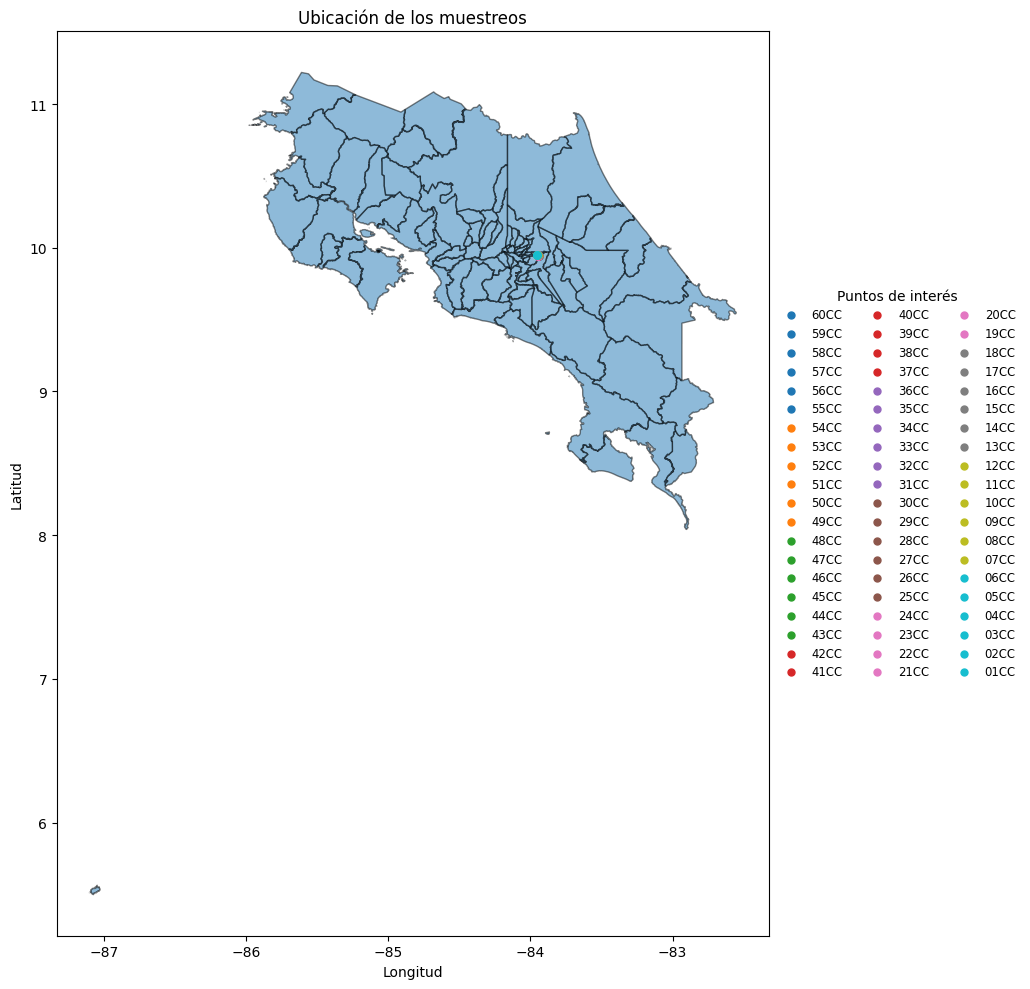

In [ ]:
# Generamos una lista de colores
num_puntos = len(gdf)
colores = plt.cm.get_cmap('tab10', num_puntos)  # Usamos una paleta de colores

# Graficamo el mapa
fig, ax = plt.subplots(figsize=(10, 10))
CR_mapa.plot(ax=ax, edgecolor='black', alpha=0.5)

# Graficamos los puntos con colores diferentes y guardamos las etiquetas
for i, (x, y, nombre) in enumerate(zip(gdf.geometry.x, gdf.geometry.y, gdf['id_cateo'])):
    ax.scatter(x, y, color=colores(i), label=nombre, s=25)  # s= tamaño del marcador

# Creamos una leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Acomodamos la leyenda como queremos, al costado derecho y en tres columnas
ax.legend(by_label.values(), by_label.keys(), title="Puntos de interés", loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, fontsize='small', frameon=False)

plt.title("Ubicación de los muestreos")
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.tight_layout()  # Ajustamos el layout para que no se superponga nada
plt.show()


In [ ]:
# Solo polígono de Cartago
CR_mapa.index = CR_mapa.Provincia
Cartago = CR_mapa[CR_mapa.Provincia == "Cartago"]
Cartago.geometry

Provincia
Cartago    POLYGON ((-83.78729 9.89183, -83.78724 9.8917,...
Cartago    POLYGON ((-83.77497 9.60568, -83.77557 9.6054,...
Cartago    POLYGON ((-83.93804 9.83929, -83.93799 9.83913...
Cartago    POLYGON ((-83.69597 9.85714, -83.69456 9.85695...
Cartago    POLYGON ((-84.00064 9.87682, -84.00126 9.87694...
Cartago    POLYGON ((-83.85797 9.87636, -83.8579 9.87595,...
Cartago    POLYGON ((-83.86776 9.76807, -83.86799 9.7671,...
Cartago    POLYGON ((-83.63026 9.58463, -83.62974 9.58557...
Name: geometry, dtype: geometry

# Vemos que los muestreos siguen concentrados en un solo canton

<ipython-input-13-d88c92fa3fb6>:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  puntos_cartago = gdf[gdf.geometry.within(cartago_mapa.unary_union)]
<ipython-input-13-d88c92fa3fb6>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', num_puntos_cartago)  # Usar una paleta de colores


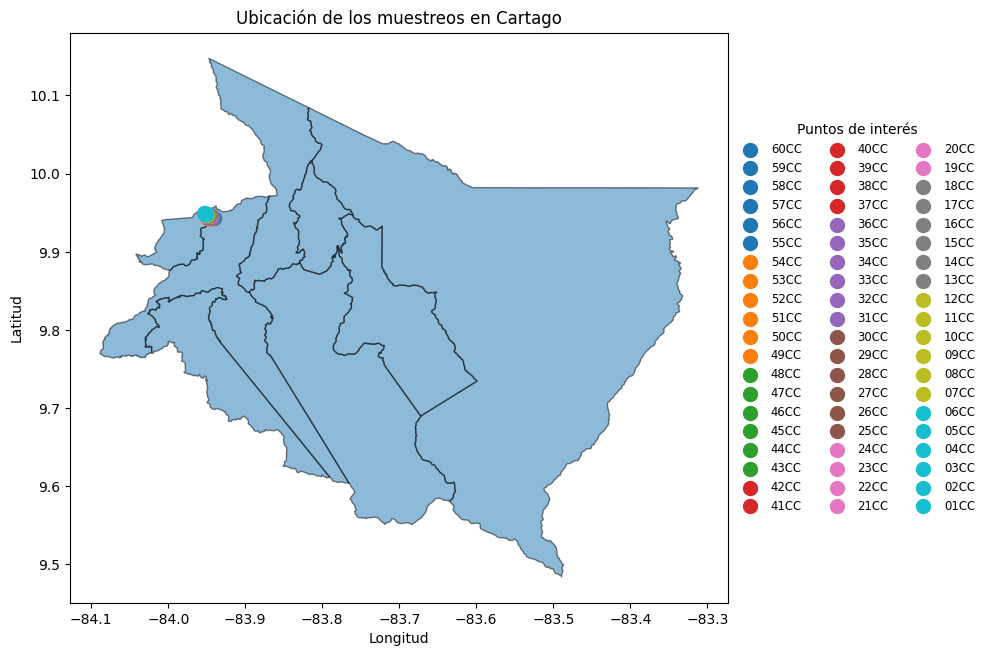

In [ ]:
# Filtramos la provincia de Cartago en el GeoDataFrame de los cantones
cartago_mapa = CR_mapa[CR_mapa['Provincia'] == 'Cartago']

# Graficamos solo el mapa de Cartago
fig, ax = plt.subplots(figsize=(10, 10))
cartago_mapa.plot(ax=ax, edgecolor='black', alpha=0.5)

# Filtramos los puntos que están dentro de Cartago
# Usamos un filtro espacial para verificar si los puntos están dentro de la geometría de Cartago
puntos_cartago = gdf[gdf.geometry.within(cartago_mapa.unary_union)]

# Generamos una lista de colores
num_puntos_cartago = len(puntos_cartago)
colores = plt.cm.get_cmap('tab10', num_puntos_cartago)  # Usar una paleta de colores

# Graficamos los puntos dentro de Cartago
for i, (x, y, nombre) in enumerate(zip(puntos_cartago.geometry.x, puntos_cartago.geometry.y, puntos_cartago['id_cateo'])):
    ax.scatter(x, y, color=colores(i), label=nombre, s=100)

# Creamos una leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Colocamos la leyenda en el lado derecho y en tres columnas
ax.legend(by_label.values(), by_label.keys(), title="Puntos de interés", loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, fontsize='small', frameon=False)

plt.title("Ubicación de los muestreos en Cartago")
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.tight_layout()
plt.show()


# Seguimos viendo que estan muy concentrados los puntos a pesar de que se filtro por cantón

<ipython-input-14-d41064c61ad5>:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  puntos_canton = gdf[gdf.geometry.within(canton_mapa.unary_union)]
<ipython-input-14-d41064c61ad5>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', num_puntos_canton)  # Usar una paleta de colores


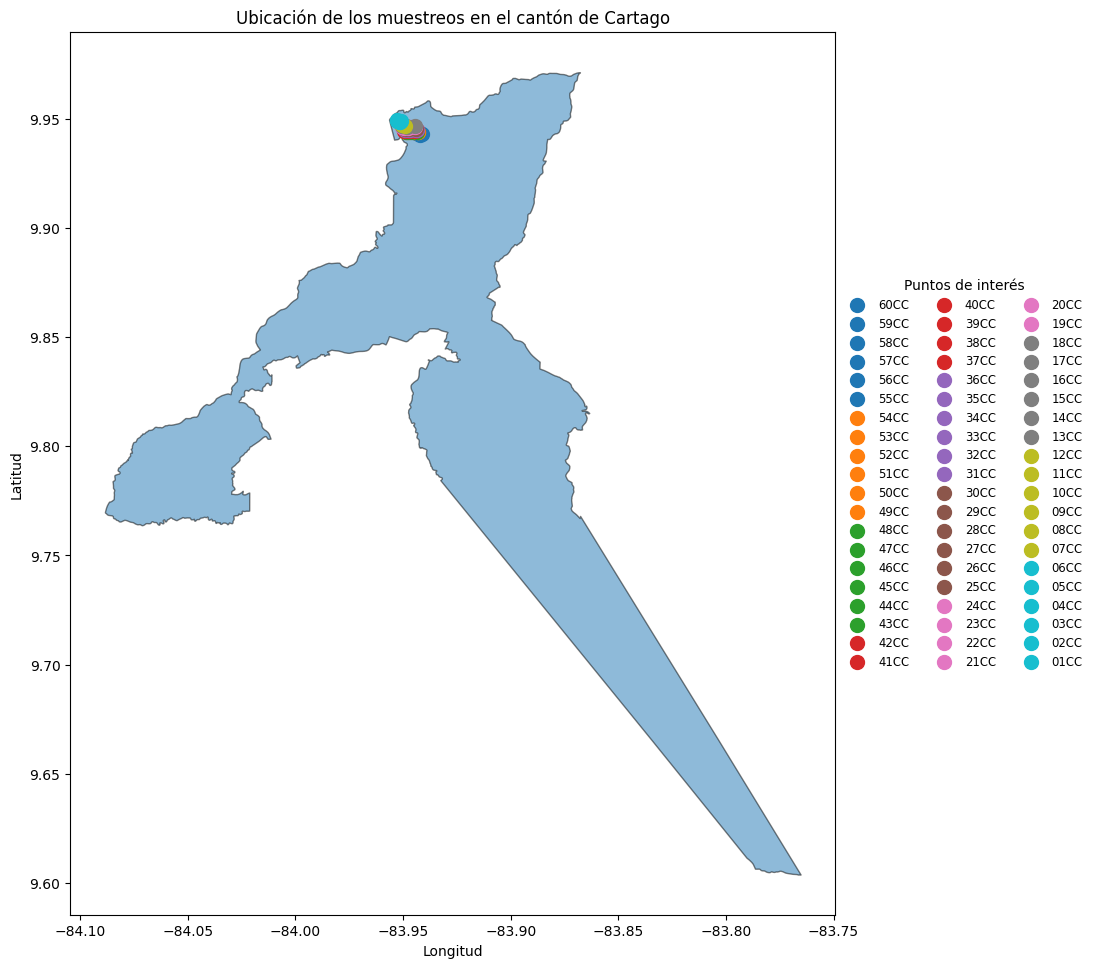

In [ ]:
# Filtramos la provincia de Cartago
cartago_mapa = CR_mapa[CR_mapa['Provincia'] == 'Cartago']

# Filtramos un cantón específico dentro de Cartago
canton_mapa = cartago_mapa[cartago_mapa['Cantones'] == 'Cartago']  # Cambia 'Cartago' por el cantón que te interese

# Graficamos solo el mapa del cantón seleccionado
fig, ax = plt.subplots(figsize=(10, 10))
canton_mapa.plot(ax=ax, edgecolor='black', alpha=0.5)

# Filtramos los puntos que están dentro del cantón seleccionado
puntos_canton = gdf[gdf.geometry.within(canton_mapa.unary_union)]

# Generamos una lista de colores
num_puntos_canton = len(puntos_canton)
colores = plt.cm.get_cmap('tab10', num_puntos_canton)  # Usar una paleta de colores

# Graficamos los puntos dentro del cantón seleccionado
for i, (x, y, nombre) in enumerate(zip(puntos_canton.geometry.x, puntos_canton.geometry.y, puntos_canton['id_cateo'])):
    ax.scatter(x, y, color=colores(i), label=nombre, s=100)

# Creamos una leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Colocamos la leyenda en el lado derecho y en tres columnas
ax.legend(by_label.values(), by_label.keys(), title="Puntos de interés", loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, fontsize='small', frameon=False)

plt.title(f"Ubicación de los muestreos en el cantón de {canton_mapa['Cantones'].values[0]}")
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-61c956ecd18f>:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  puntos_canton = gdf[gdf.geometry.within(canton_mapa.unary_union)]
<ipython-input-15-61c956ecd18f>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', num_puntos_canton)  # Usar una paleta de colores
<ipython-input-15-61c956ecd18f>:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


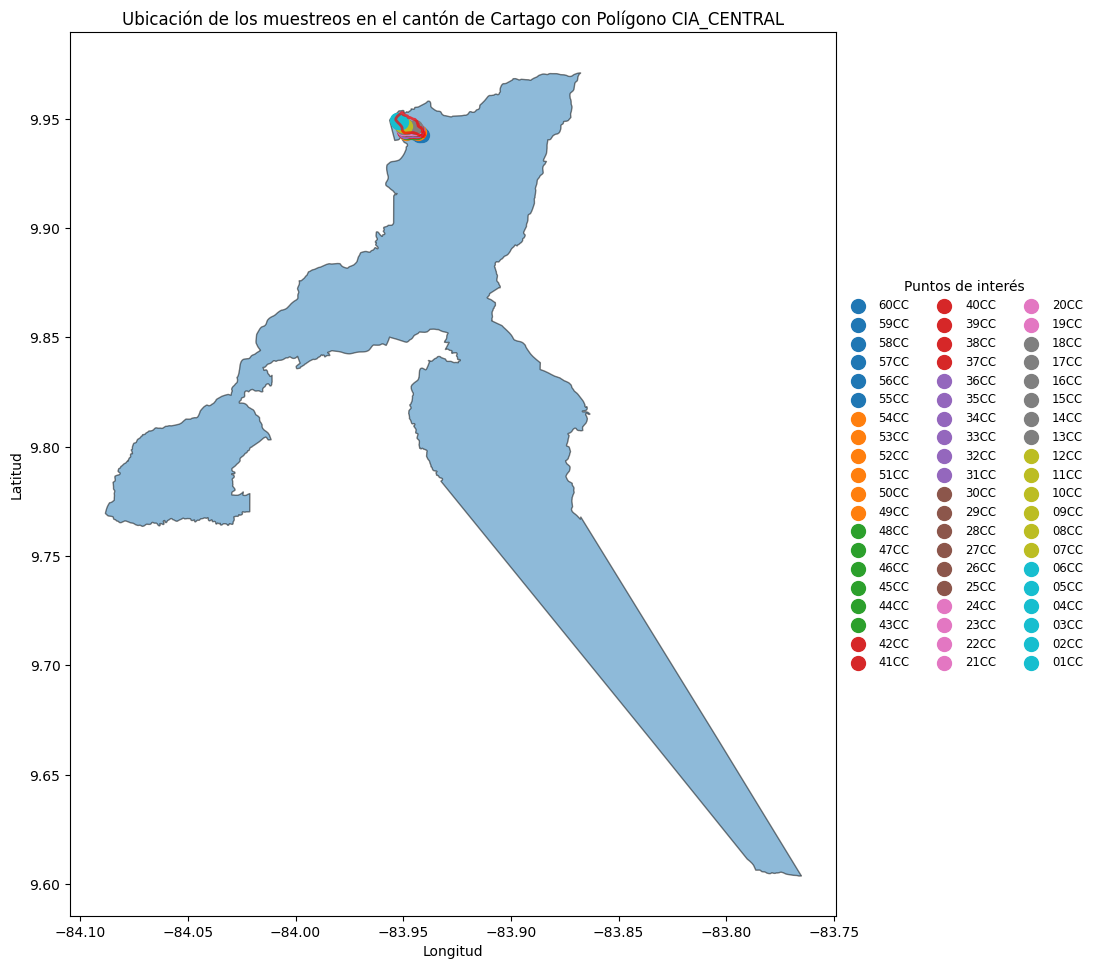

In [ ]:
# Ahora cargo el poligono de la finca dentro del mapa del canton de Cartago.

from google.colab import drive
drive.mount('/content/drive')
import geopandas as gpd

# Especifica la ruta al archivo KML
file_path = '/content/drive/MyDrive/Colab_Notebooks/CIA_CENTRAL.kml'

# Cargar el archivo KML
gdf_kml = gpd.read_file(file_path, driver='KML')


# Filtramos la provincia de Cartago
cartago_mapa = CR_mapa[CR_mapa['Provincia'] == 'Cartago']

# Filtramos un cantón específico dentro de Cartago (en este caso 'Cartago')
canton_mapa = cartago_mapa[cartago_mapa['Cantones'] == 'Cartago']

# Graficamos el mapa del cantón seleccionado
fig, ax = plt.subplots(figsize=(10, 10))
canton_mapa.plot(ax=ax, edgecolor='black', alpha=0.5)

# Filtramos los puntos que están dentro del cantón seleccionado
puntos_canton = gdf[gdf.geometry.within(canton_mapa.unary_union)]

# Generamos una lista de colores para los puntos
num_puntos_canton = len(puntos_canton)
colores = plt.cm.get_cmap('tab10', num_puntos_canton)

# Graficamos los puntos dentro del cantón seleccionado
for i, (x, y, nombre) in enumerate(zip(puntos_canton.geometry.x, puntos_canton.geometry.y, puntos_canton['id_cateo'])):
    ax.scatter(x, y, color=colores(i), label=nombre, s=100)

# Cargamos y filtramos el polígono del CIA_CENTRAL
# Aseguramos de que gdf_kml esté definido previamente
poligono_interes = gdf_kml  # Ajustamos esta línea ya que tenemos múltiples geometrías en el KML

# Graficamos el polígono CIA_CENTRAL sobre el cantón y los puntos de muestreo
poligono_interes.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, alpha=0.7, label='Polígono CIA_CENTRAL')

# Creamos una leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Colocamos la leyenda en el lado derecho y en tres columnas
ax.legend(by_label.values(), by_label.keys(), title="Puntos de interés", loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, fontsize='small', frameon=False)

plt.title(f"Ubicación de los muestreos en el cantón de {canton_mapa['Cantones'].values[0]} con Polígono CIA_CENTRAL")
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.tight_layout()
plt.show()


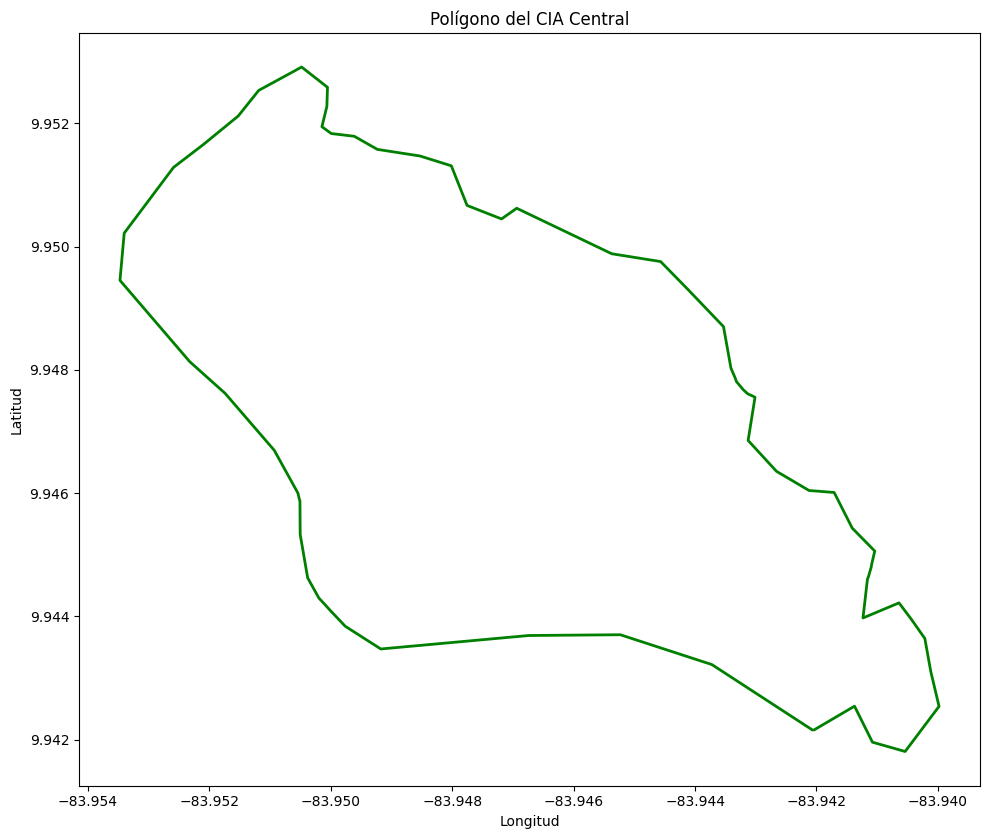

In [ ]:
# Cargamos el polígono de la finca del CIA Central

# Ruta del archivo KML en Google Drive
kml_path = '/content/drive/MyDrive/Colab_Notebooks/CIA_CENTRAL.kml'
gdf = gpd.read_file(kml_path)

poligono_cartago = gdf

# Graficamos el polígono del CIA_Central
fig, ax = plt.subplots(figsize=(10, 10))
poligono_cartago.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2)

plt.title('Polígono del CIA Central')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.tight_layout()
plt.show()


<ipython-input-17-9267c791b7cd>:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_interes = gdf_kml.unary_union
<ipython-input-17-9267c791b7cd>:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


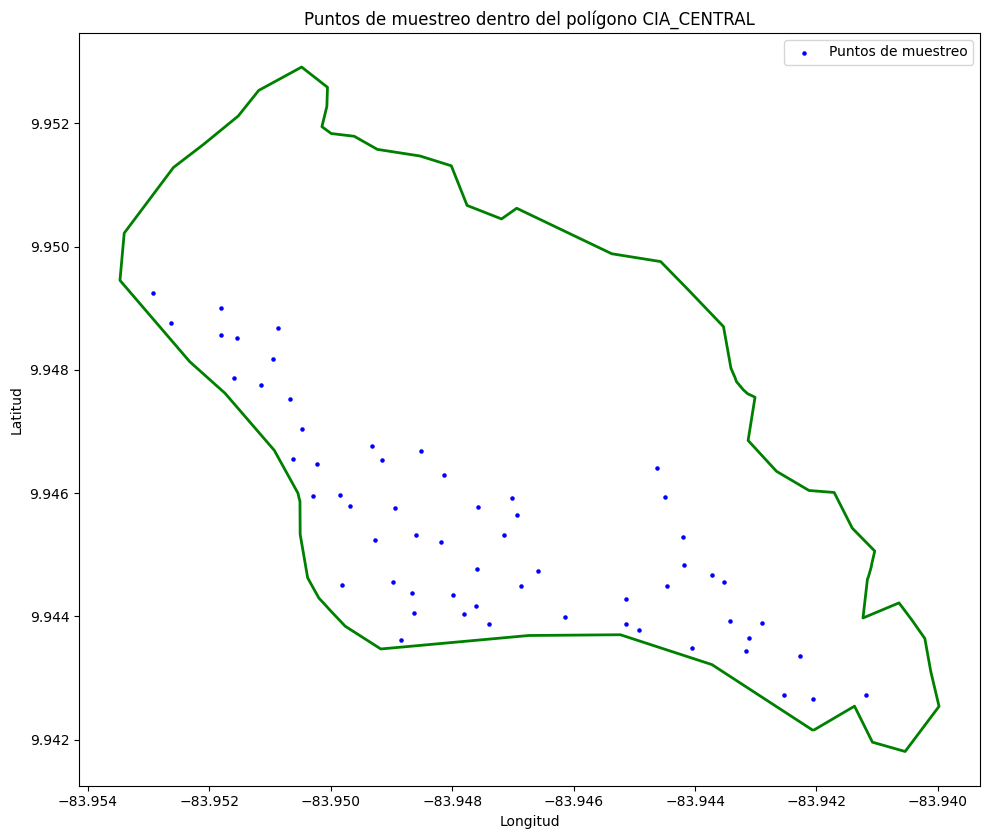

In [ ]:
# Convertimos los puntos de muestreo a un GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitud'], df['latitud'])]
gdf_puntos = gpd.GeoDataFrame(df, geometry=geometry)

# Aseguramos que ambos GeoDataFrames tengan el mismo CRS, es decir todo tiene que estar en el mismo sistema de coordenadas
gdf_kml = gdf_kml.to_crs("EPSG:4326")
gdf_puntos = gdf_puntos.set_crs("EPSG:4326", allow_override=True)

# Filtramos los puntos que están dentro del polígono de CIA_CENTRAL
poligono_interes = gdf_kml.unary_union
puntos_dentro = gdf_puntos[gdf_puntos.geometry.within(poligono_interes)]

# Graficamos el polígono y los puntos de muestreo dentro del mismo
fig, ax = plt.subplots(figsize=(10, 10))
gdf_kml.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, label='Polígono CIA_CENTRAL')
puntos_dentro.plot(ax=ax, marker='o', color='blue', markersize=5, label='Puntos de muestreo')

# Agregamos etiquetas y leyenda
plt.title('Puntos de muestreo dentro del polígono CIA_CENTRAL')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()

plt.tight_layout()
plt.show()



# Cargamos el mapa anterior en una ortofoto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 65.3 MB/s eta 0:00:00


<ipython-input-18-2b0e91d865a7>:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_interes = gdf_kml.geometry.unary_union
<ipython-input-18-2b0e91d865a7>:51: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


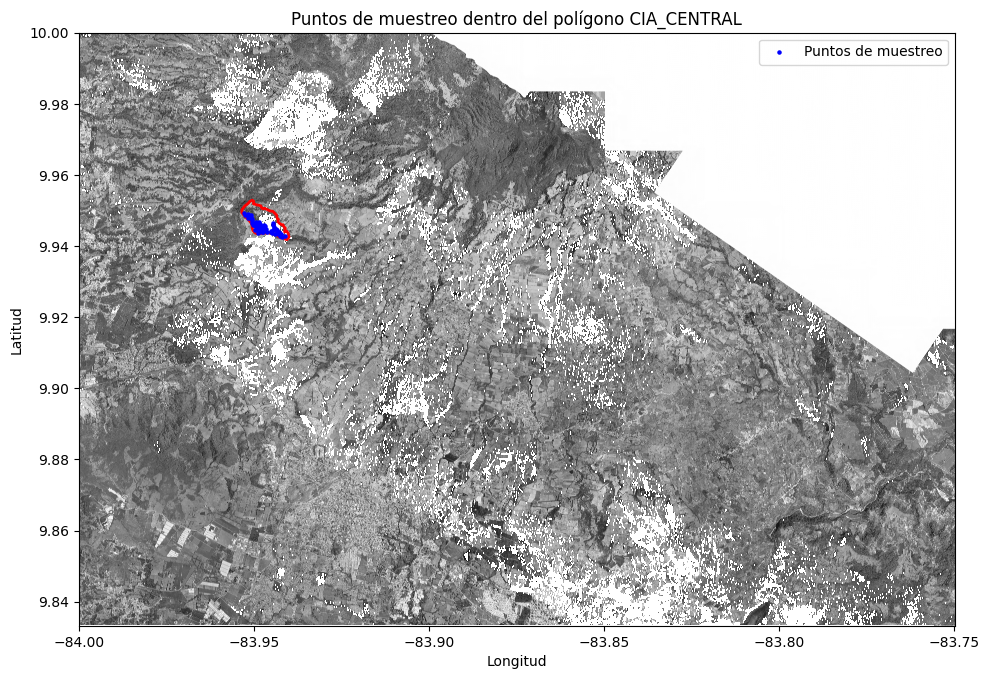

In [ ]:
!pip install rasterio


import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import rasterio
from rasterio.plot import show

# Ruta del archivo KML y la ortofoto en Google Drive
kml_path = '/content/drive/MyDrive/Colab_Notebooks/CIA_CENTRAL.kml'
ortofoto_path = '/content/drive/MyDrive/Colab_Notebooks/ortofo.tif'

# Leemos el archivo KML
gdf_kml = gpd.read_file(kml_path)

# Convertimos los puntos de muestreo a un GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitud'], df['latitud'])]
gdf_puntos = gpd.GeoDataFrame(df, geometry=geometry)

# Aseguramos que ambos GeoDataFrames tengan el mismo CRS
gdf_kml = gdf_kml.to_crs("EPSG:4326")
gdf_puntos = gdf_puntos.set_crs("EPSG:4326", allow_override=True)

# Filtramos los puntos que están dentro del polígono de CIA_CENTRAL
poligono_interes = gdf_kml.geometry.unary_union
puntos_dentro = gdf_puntos[gdf_puntos.geometry.within(poligono_interes)]

# Graficamos el polígono y los puntos de muestreo dentro del mismo
fig, ax = plt.subplots(figsize=(10, 10))

# Mostramos la ortofoto y obtenemos los límites
with rasterio.open(ortofoto_path) as src:
    # Obtenemos los límites de la ortofoto
    bounds = src.bounds
    lon_min, lat_min, lon_max, lat_max = bounds

    # Mostramos la ortofoto
    show(src, ax=ax, cmap='gray', extent=[lon_min, lon_max, lat_min, lat_max])

# Graficamos el polígono
gdf_kml.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Polígono CIA_CENTRAL')

# Graficamos los puntos de muestreo
puntos_dentro.plot(ax=ax, marker='o', color='blue', markersize=5, label='Puntos de muestreo')

# Agregamos etiquetas y leyenda
plt.title('Puntos de muestreo dentro del polígono CIA_CENTRAL')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Cortamos la ortofoto en base al polígono

<ipython-input-20-5d892bb95d57>:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)
<ipython-input-20-5d892bb95d57>:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


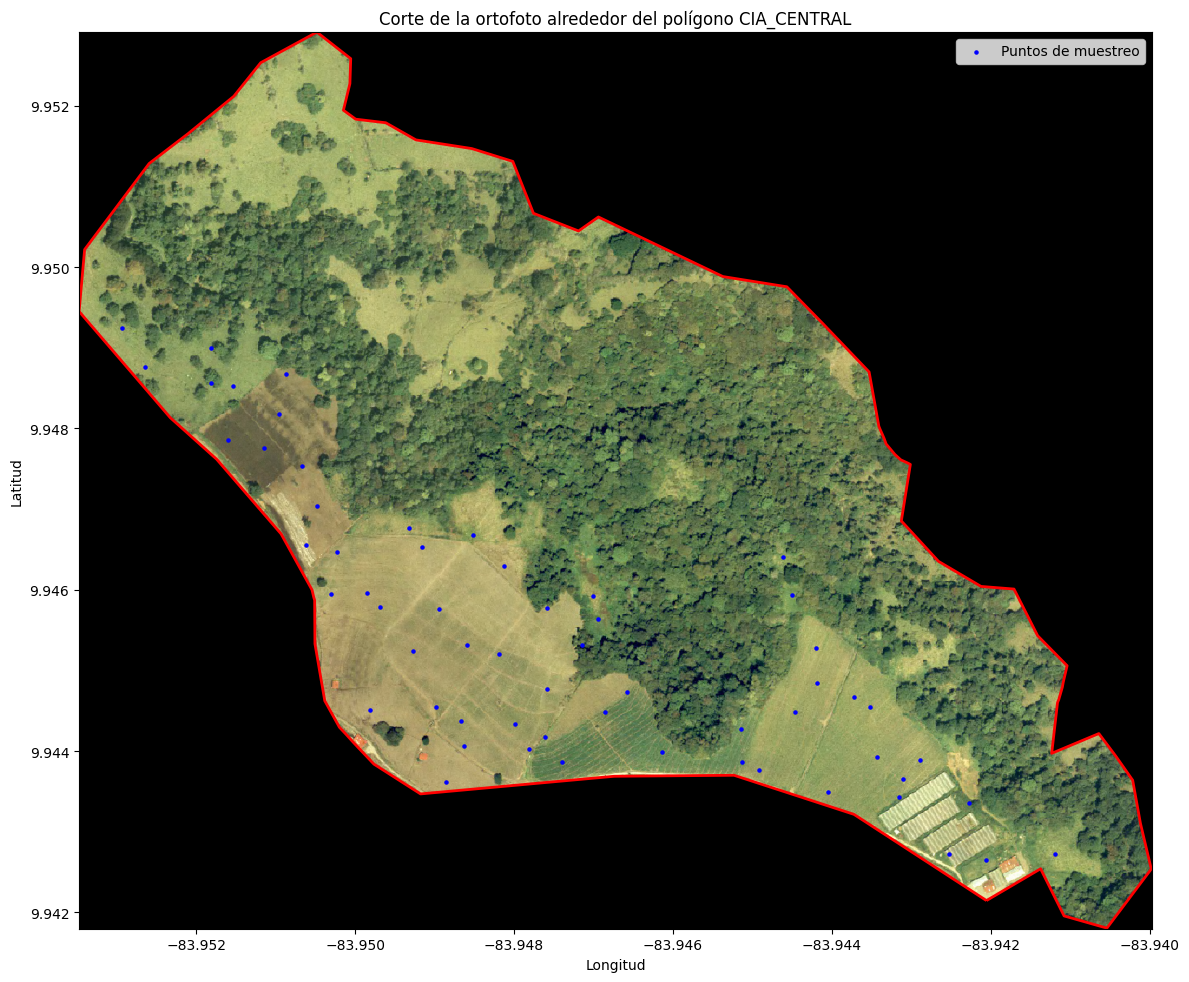

In [ ]:
from rasterio.plot import show
from rasterio.mask import mask

# Obtenemos los límites del polígono (bounding box)
minx, miny, maxx, maxy = gdf_kml.total_bounds

# Creamos una figura y ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Mostramos la ortofoto y ajustamos a los límites del polígono
with rasterio.open(ortofoto_path) as src:
    # Cortamos la ortofoto usando el polígono
    out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)

    # Mostramos la ortofoto cortada
    show(out_image, ax=ax, transform=out_transform, cmap='gray', alpha=1)

# Graficamos el polígono
gdf_kml.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Polígono CIA_CENTRAL')

# Graficamos los puntos de muestreo
puntos_dentro.plot(ax=ax, marker='o', color='blue', markersize=5, label='Puntos de muestreo')

# Agregamos etiquetas y leyenda
plt.title('Corte de la ortofoto alrededor del polígono CIA_CENTRAL')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()

plt.tight_layout()
plt.show()


# ** Mapa de calor de variable de materia orgánica**


<ipython-input-21-5a7b035c2360>:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)
<ipython-input-21-5a7b035c2360>:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


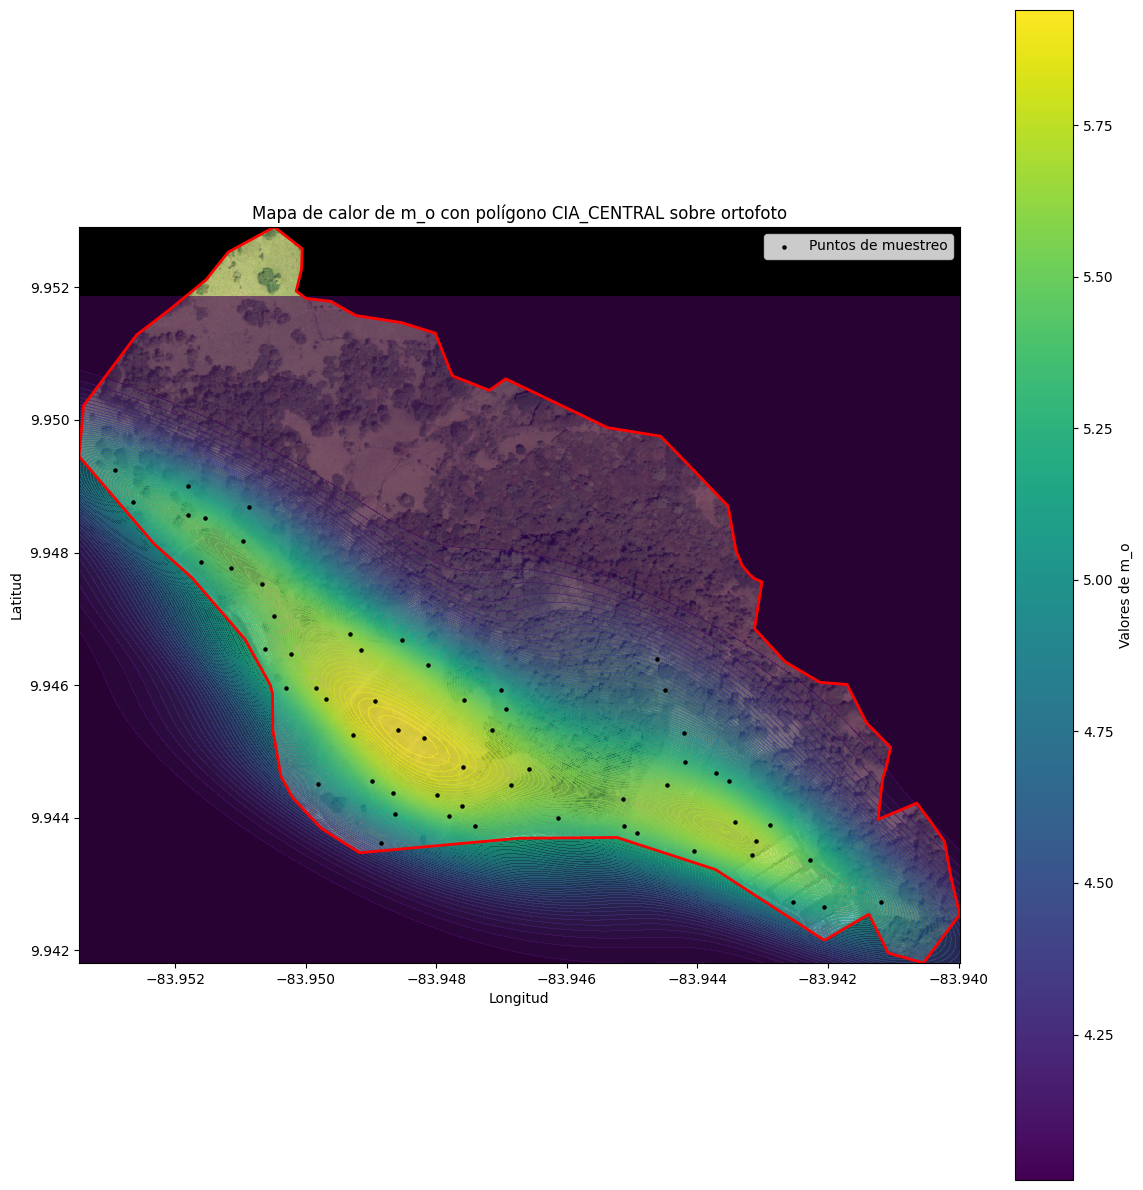

In [ ]:
from shapely.geometry import Point

# Obtenemos los límites del polígono (bounding box)
minx, miny, maxx, maxy = gdf_kml.total_bounds

# Creamos una figura y ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Mostramos la ortofoto y ajustamos a los límites del polígono
with rasterio.open(ortofoto_path) as src:
    # Cortamos la ortofoto usando el polígono
    out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)

    # Mostramos la ortofoto cortada
    show(out_image, ax=ax, transform=out_transform, cmap='gray', alpha=1)

# Creamos un mapa de calor con transparencia para superponerlo en la ortofoto
sns.kdeplot(
    x=gdf_puntos['longitud'],
    y=gdf_puntos['latitud'],
    weights=gdf_puntos['m_o'],
    fill=True,
    cmap='viridis',
    ax=ax,
    thresh=0,
    levels=100,
    alpha=0.6  # Ajusta la transparencia del mapa de calor
)

# Graficamos todos los puntos sobre el mapa de calor
gdf_puntos.plot(ax=ax, marker='o', color='black', markersize=5, label='Puntos de muestreo')

# Graficamos el polígono CIA_CENTRAL sobre el mapa de calor
gdf_kml.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Polígono CIA_CENTRAL')

# Establecemos los límites del gráfico a los límites del polígono
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Agregamos una barra de color para representar los valores de m_o
norm = plt.Normalize(vmin=gdf_puntos['m_o'].min(), vmax=gdf_puntos['m_o'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Para evitar el error de Matplotlib
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Valores de m_o')

plt.title('Mapa de calor de m_o con polígono CIA_CENTRAL sobre ortofoto')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.tight_layout()
plt.show()


# Mapa de calor de capacidad de intercambio catiónico efectiva


<ipython-input-22-35c9f261df17>:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)
<ipython-input-22-35c9f261df17>:48: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


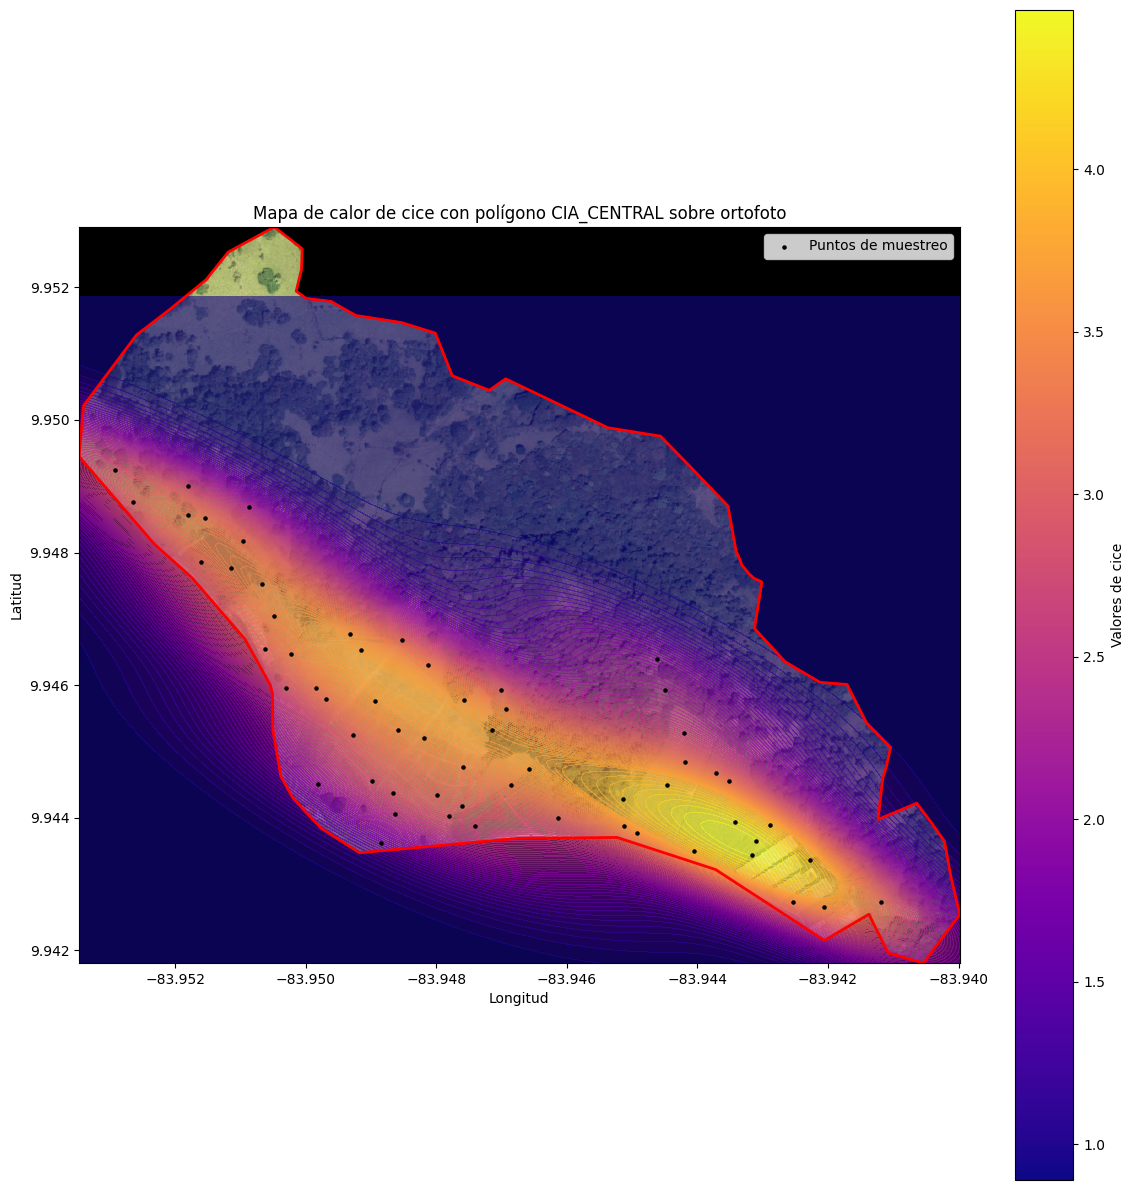

In [ ]:
# Obtenemos los límites del polígono (bounding box)
minx, miny, maxx, maxy = gdf_kml.total_bounds

# Creamos una figura y ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Mostramos la ortofoto y ajustamos a los límites del polígono
with rasterio.open(ortofoto_path) as src:
    # Cortamos la ortofoto usando el polígono
    out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)

    # Mostramos la ortofoto cortada
    show(out_image, ax=ax, transform=out_transform, cmap='gray', alpha=1)

# Creamos un mapa de calor con la variable 'cice' con transparencia
sns.kdeplot(
    x=gdf_puntos['longitud'],
    y=gdf_puntos['latitud'],
    weights=gdf_puntos['cice'],  # Usamos variable 'cice'
    fill=True,
    cmap='plasma',  # Cambiamos la paleta aquí
    ax=ax,
    thresh=0,
    levels=100,
    alpha=0.6  # Ajustamos la transparencia del mapa de calor
)

# Graficamos todos los puntos sobre el mapa de calor
gdf_puntos.plot(ax=ax, marker='o', color='black', markersize=5, label='Puntos de muestreo')

# Graficamos el polígono CIA_CENTRAL sobre el mapa de calor
gdf_kml.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Polígono CIA_CENTRAL')

# Establecemos los límites del gráfico a los límites del polígono
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Agregamos una barra de color para representar los valores de 'cice'
norm = plt.Normalize(vmin=gdf_puntos['cice'].min(), vmax=gdf_puntos['cice'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])  # Para evitar el error de Matplotlib
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Valores de cice')

plt.title('Mapa de calor de cice con polígono CIA_CENTRAL sobre ortofoto')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.tight_layout()
plt.show()


# Mapa de calor de porcentaje de arcilla

<ipython-input-24-a9929082ca31>:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)
<ipython-input-24-a9929082ca31>:48: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


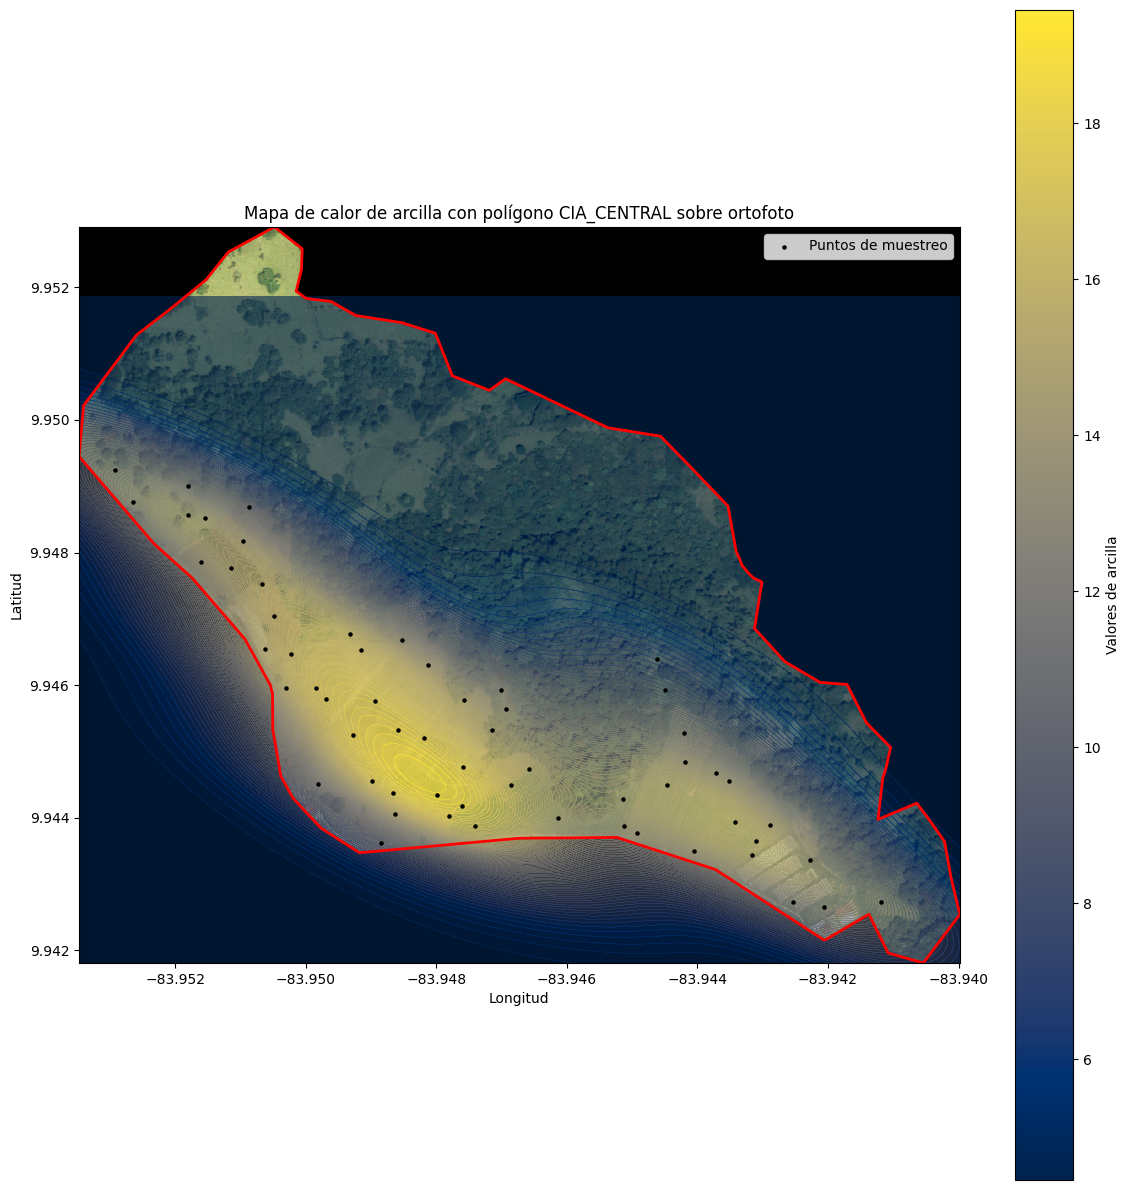

In [ ]:
# Obtenemos los límites del polígono (bounding box)
minx, miny, maxx, maxy = gdf_kml.total_bounds

# Creamos una figura y ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Mostramos la ortofoto y ajustamos a los límites del polígono
with rasterio.open(ortofoto_path) as src:
    # Cortamos la ortofoto usando el polígono
    out_image, out_transform = mask(src, [gdf_kml.geometry.unary_union], crop=True)

    # Mostramos la ortofoto cortada
    show(out_image, ax=ax, transform=out_transform, cmap='gray', alpha=1)  # Sin transparencia para la ortofoto

# Creamos un mapa de calor con la variable 'arcilla' con transparencia
sns.kdeplot(
    x=gdf_puntos['longitud'],
    y=gdf_puntos['latitud'],
    weights=gdf_puntos['arcilla'],
    fill=True,
    cmap='cividis',  # Cambiamos la paleta aquí
    ax=ax,
    thresh=0,
    levels=100,
    alpha=0.6  # Ajustamos la transparencia del mapa de calor
)

# Graficamos todos los puntos sobre el mapa de calor
gdf_puntos.plot(ax=ax, marker='o', color='black', markersize=5, label='Puntos de muestreo')

# Graficamos el polígono CIA_CENTRAL sobre el mapa de calor
gdf_kml.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Polígono CIA_CENTRAL')

# Establecemos los límites del gráfico a los límites del polígono
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Agregamos una barra de color para representar los valores de 'arcilla'
norm = plt.Normalize(vmin=gdf_puntos['arcilla'].min(), vmax=gdf_puntos['arcilla'].max())
sm = plt.cm.ScalarMappable(cmap='cividis', norm=norm)
sm.set_array([])  # Para evitar el error de Matplotlib
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Valores de arcilla')

plt.title('Mapa de calor de arcilla con polígono CIA_CENTRAL sobre ortofoto')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.tight_layout()
plt.show()


# Descripción de los resultados

Se pueden observar dos cluster en el mapa en cuanto a materia orgánica, sin embargo, dentro de la clasificación de estos valores oscilan entre 4 y 10, los cuales son clasificados como intermedios.

En cuando a capacidad de intercambio cationico efectiva los valores oscilan entre 1 a 5, se consideraría un valor bajo. Por lo que es un parámetro vulnerable.

Para la variable de arcilla los valores oscilan de 5 a 18, se consideran suelos de texturas francas a arenos que tiene porcentajes bajos de arcilla.


# Conclusiones

A partir de las tres variables analizadas, el manejo del suelo se puede dar de forma similar.

Las prácticas de conservación de suelo son indispensables para conservar las caracteristicas de CICE y M.O.

**Referencias**

Lal, R. (2020). Soil organic matter content and crop yield. Journal of Soil and Water Conservation, 75(2), 27A–32A. https://doi.org/10.2489/jswc.75.2.27A

McBratney, A. B., Mendonça Santos, M. L., & Minasny, B. (2003). On digital soil mapping. Geoderma, 117(1–2), 3–52. https://doi.org/10.1016/S0016-7061(03)00223-4

Ranjan, M., Mritunjay, Barot, K., Khairnar, V., Rawal, V., Pimpalgaonkar, A., Saxena, S., & Sattar, A. (2023). Python: Empowering data science applications and research. *Journal of Operating Systems Development & Trends*, *10*(1), 27–33. https://doi.org/10.37591/joosdt.v10i1.576

Weil, R., & Brady, N. (2017). The nature and properties of soils (15th ed.). Pearson.